In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv(r'C:/Users/neeta/OneDrive/Documents/kaggle/archive/user_behavior_dataset.csv')

In [3]:
print(df.shape)
df.head()

(700, 11)


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


<Axes: xlabel='Data Usage (MB/day)', ylabel='Age'>

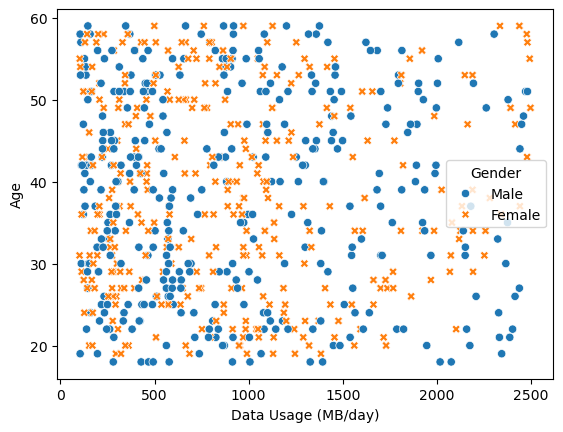

In [4]:
sns.scatterplot(data=df,x=df['Data Usage (MB/day)'],y=df['Age'],hue=df['Gender'],style=df['Gender'])

#### as visible from scatter plot, it is challenging to find which age has more 'Data Usage' among both gender.

In [5]:
df.isna().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

<Axes: xlabel='Age'>

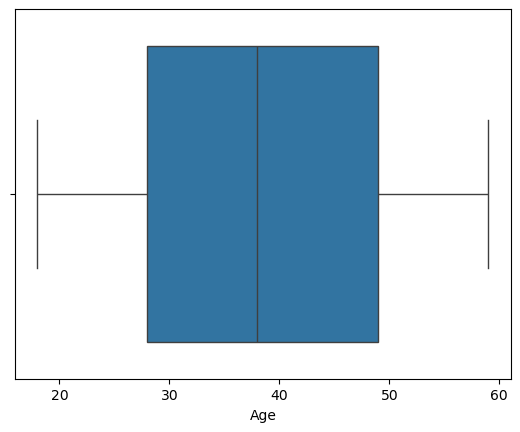

In [6]:
sns.boxplot(data=df, x='Age')

In [7]:
# Detect outliers using IQR (Interquartile Range) method
Q1 = df['Data Usage (MB/day)'].quantile(0.25)
Q3 = df['Data Usage (MB/day)'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nLower bound for outliers in 'age': {lower_bound}")
print(f"Upper bound for outliers in 'age': {upper_bound}")

# Filter out outliers
outliers = df[(df['Data Usage (MB/day)'] < lower_bound) | (df['Data Usage (MB/day)'] > upper_bound)]
print(f"\nOutliers in 'Data Usage (MB/day)' column:\n{outliers}")

# Step 4: Handle outliers (Cap the outliers within the threshold)
df['Data Usage (MB/day)'] = np.where(df['Data Usage (MB/day)'] > upper_bound, upper_bound, 
                     np.where(df['Data Usage (MB/day)'] < lower_bound, lower_bound, df['Data Usage (MB/day)']))

print("\nDataframe after handling outliers:")
print(df)



Lower bound for outliers in 'age': -1079.0
Upper bound for outliers in 'age': 2793.0

Outliers in 'Data Usage (MB/day)' column:
Empty DataFrame
Columns: [User ID, Device Model, Operating System, App Usage Time (min/day), Screen On Time (hours/day), Battery Drain (mAh/day), Number of Apps Installed, Data Usage (MB/day), Age, Gender, User Behavior Class]
Index: []

Dataframe after handling outliers:
     User ID        Device Model Operating System  App Usage Time (min/day)  \
0          1      Google Pixel 5          Android                       393   
1          2           OnePlus 9          Android                       268   
2          3        Xiaomi Mi 11          Android                       154   
3          4      Google Pixel 5          Android                       239   
4          5           iPhone 12              iOS                       187   
..       ...                 ...              ...                       ...   
695      696           iPhone 12             

In [24]:
# Select non-categorical columns (age and Data Usage in this case)
# extract x-axis & y-axis
# transfer categorical columns to non-categorical - one-hot encoding , label encoding
from sklearn.preprocessing import LabelEncoder

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

X = df[['Data Usage (MB/day)', 'Age']]
y = df['Gender'] 

# standarization of data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 

In [25]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [26]:
p.fit(X,y)

Perceptron()

In [27]:
p.coef_


array([[-185., -406.]])

In [28]:
p.intercept_

array([-35.])

In [34]:
y.dtype
y = np.int64(y)

<Axes: >

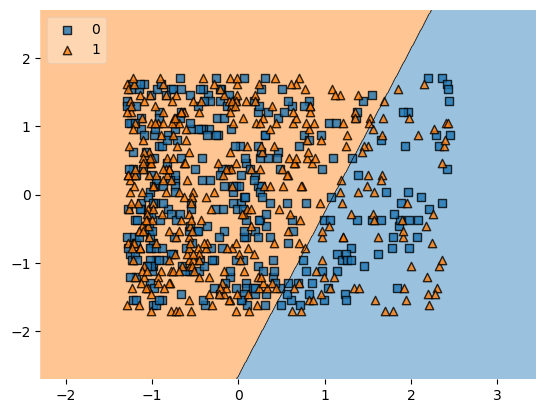

In [35]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_scaled, y, clf=p, legend=2)

In [33]:

from sklearn.model_selection import train_test_split


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


p.fit(X_train, y_train)

# Model evaluation
score = p.score(X_test, y_test)
print("Model accuracy:", score)


Model accuracy: 0.4785714285714286
